In [1]:
import numpy as np

In [41]:
theta = np.pi / 3.0
theta

1.0471975511965976

In [88]:
R = np.array([[np.cos(theta), -np.sin(theta)],
             [np.sin(theta), np.cos(theta)]])
print(R,R.shape,"R")

[[ 0.5       -0.8660254]
 [ 0.8660254  0.5      ]] (2, 2) R


In [89]:
sigma = np.array([2,0.5])
sigma = np.diag(sigma)
print(sigma,sigma.shape,"sigma")

[[2.  0. ]
 [0.  0.5]] (2, 2) sigma


In [83]:
origin = np.array([2,1])
origin = np.diag(origin)
origin

array([[2, 0],
       [0, 1]])

In [47]:
ones = np.ones((2, count))
print(ones,ones.shape,"ones")

[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]] (2, 10000) ones


In [85]:
Xc = origin @ ones
print(Xc,Xc.shape,"Xc")

[[2. 2. 2. ... 2. 2. 2.]
 [1. 1. 1. ... 1. 1. 1.]] (2, 10000) Xc


In [53]:
count = 10000
random = np.random.randn(2,count)
print(random,random.shape,"random")

[[ 1.45882276  0.74563686 -1.04765672 ... -0.46104524  0.96021365
  -1.08752672]
 [ 1.23742088  0.2673155  -0.52328293 ...  0.66657151 -0.69277521
  -0.8478985 ]] (2, 10000) random


In [91]:
sigma_rotated = R @ sigma @ random
print(X,X.shape,"X")

[[ 2.9230038   2.62988585  1.17893143 ...  1.25032083  3.26019412
   1.2796241 ]
 [ 3.83611036  2.35830979 -0.94541541 ...  0.3680891   2.48994503
  -1.09562616]] (2, 10000) X


In [92]:
X = sigma_rotated + Xc
print(X,X.shape,"random")

[[ 2.9230038   2.62988585  1.17893143 ...  1.25032083  3.26019412
   1.2796241 ]
 [ 3.83611036  2.35830979 -0.94541541 ...  0.3680891   2.48994503
  -1.09562616]] (2, 10000) random


In [69]:
X = X @ random 
print(X,X.shape,"random")

[[ 0.9230038   0.62988585 -0.82106857 ... -0.74967917  1.26019412
  -0.7203759 ]
 [ 2.83611036  1.35830979 -1.94541541 ... -0.6319109   1.48994503
  -2.09562616]] (2, 10000) random


/home/usv/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  after removing the cwd from sys.path.


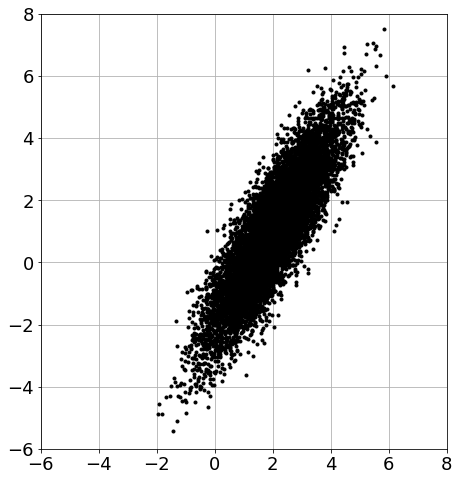

In [157]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax1.plot(X[0,:],X[1,:], '.', Color='k')
ax1.grid()
plt.xlim((-6, 8))
plt.ylim((-6,8))
plt.show()

In [161]:
x_mean = np.mean(X,axis=1)
print(x_mean,x_mean.shape,"x_mean")

[2.00030586 0.99042495] (2,) x_mean


In [170]:
tile = np.tile(x_mean, (count,1)).T
print(tile,tile.shape,"tile")

[[2.00030586 2.00030586 2.00030586 ... 2.00030586 2.00030586 2.00030586]
 [0.99042495 0.99042495 0.99042495 ... 0.99042495 0.99042495 0.99042495]] (2, 10000) tile


In [174]:
B = X - tile
print(B,B.shape,"B")

[[ 0.92269794  0.62957999 -0.82137443 ... -0.74998503  1.25988826
  -0.72068176]
 [ 2.84568542  1.36788485 -1.93584036 ... -0.62233585  1.49952008
  -2.08605111]] (2, 10000) B


In [175]:
covariance = B.T @ B
print(covariance,covariance.shape,"hermitian")

[[ 8.94929697  4.47348211 -6.26667316 ... -2.46298169  5.42965873
  -6.60121678]
 [ 4.47348211  2.26747991 -3.16512759 ... -1.32345934  2.84437123
  -3.30720451]
 [-6.26667316 -3.16512759  4.42213384 ...  1.82076138 -3.93767149
   4.63021149]
 ...
 [-2.46298169 -1.32345934  1.82076138 ...  0.94977946 -1.87810244
   1.83872492]
 [ 5.42965873  2.84437123 -3.93767149 ... -1.87810244  3.8358789
  -4.03605402]
 [-6.60121678 -3.30720451  4.63021149 ...  1.83872492 -4.03605402
   4.87099142]] (10000, 10000) hermitian


In [176]:
U,S,VT = np.linalg.svd(B / np.sqrt(count), full_matrices=False)
S_diag = np.diag(S)
print(U,U.shape,"U")
print(S_diag,S_diag.shape,"S_diag")
print(VT,VT.shape,"VT")

[[-0.50151571 -0.86514854]
 [-0.86514854  0.50151571]] (2, 2) U
[[2.00989243 0.        ]
 [0.         0.49489523]] (2, 2) S_diag
[[-0.01455147 -0.00745895  0.01038226 ...  0.0045502  -0.00959833
   0.01077758]
 [ 0.01270744  0.00285587 -0.00525856 ...  0.00680421 -0.00682887
  -0.00854101]] (2, 10000) VT


In [177]:
theta = np.arange(0,1,0.01)
print(theta,theta.shape,"theta")

[0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27
 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41
 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55
 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69
 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83
 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97
 0.98 0.99] (100,) theta


In [178]:
theta = 2 * np.pi * theta
print(theta,theta.shape,"theta")

[0.         0.06283185 0.12566371 0.18849556 0.25132741 0.31415927
 0.37699112 0.43982297 0.50265482 0.56548668 0.62831853 0.69115038
 0.75398224 0.81681409 0.87964594 0.9424778  1.00530965 1.0681415
 1.13097336 1.19380521 1.25663706 1.31946891 1.38230077 1.44513262
 1.50796447 1.57079633 1.63362818 1.69646003 1.75929189 1.82212374
 1.88495559 1.94778745 2.0106193  2.07345115 2.136283   2.19911486
 2.26194671 2.32477856 2.38761042 2.45044227 2.51327412 2.57610598
 2.63893783 2.70176968 2.76460154 2.82743339 2.89026524 2.95309709
 3.01592895 3.0787608  3.14159265 3.20442451 3.26725636 3.33008821
 3.39292007 3.45575192 3.51858377 3.58141563 3.64424748 3.70707933
 3.76991118 3.83274304 3.89557489 3.95840674 4.0212386  4.08407045
 4.1469023  4.20973416 4.27256601 4.33539786 4.39822972 4.46106157
 4.52389342 4.58672527 4.64955713 4.71238898 4.77522083 4.83805269
 4.90088454 4.96371639 5.02654825 5.0893801  5.15221195 5.2150438
 5.27787566 5.34070751 5.40353936 5.46637122 5.52920307 5.592034

In [167]:
R_theta = np.array([np.cos(theta),np.sin(theta)])
print(R_theta,R_theta.shape,"R_theta")

[[ 1.00000000e+00  9.98026728e-01  9.92114701e-01  9.82287251e-01
   9.68583161e-01  9.51056516e-01  9.29776486e-01  9.04827052e-01
   8.76306680e-01  8.44327926e-01  8.09016994e-01  7.70513243e-01
   7.28968627e-01  6.84547106e-01  6.37423990e-01  5.87785252e-01
   5.35826795e-01  4.81753674e-01  4.25779292e-01  3.68124553e-01
   3.09016994e-01  2.48689887e-01  1.87381315e-01  1.25333234e-01
   6.27905195e-02  6.12323400e-17 -6.27905195e-02 -1.25333234e-01
  -1.87381315e-01 -2.48689887e-01 -3.09016994e-01 -3.68124553e-01
  -4.25779292e-01 -4.81753674e-01 -5.35826795e-01 -5.87785252e-01
  -6.37423990e-01 -6.84547106e-01 -7.28968627e-01 -7.70513243e-01
  -8.09016994e-01 -8.44327926e-01 -8.76306680e-01 -9.04827052e-01
  -9.29776486e-01 -9.51056516e-01 -9.68583161e-01 -9.82287251e-01
  -9.92114701e-01 -9.98026728e-01 -1.00000000e+00 -9.98026728e-01
  -9.92114701e-01 -9.82287251e-01 -9.68583161e-01 -9.51056516e-01
  -9.29776486e-01 -9.04827052e-01 -8.76306680e-01 -8.44327926e-01
  -8.09016

In [180]:
# 1-std confidence interval
deviation = U @ np.diag(S) @ R_theta
print(deviation,deviation.shape,"deviation")

[[-1.00799264 -1.03288785 -1.05370673 -1.0703671  -1.08280323 -1.09096603
  -1.09482328 -1.09435977 -1.08957732 -1.0804948  -1.06714806 -1.04958978
  -1.02788925 -1.00213211 -0.97242001 -0.93887021 -0.90161512 -0.86080177
  -0.81659123 -0.76915797 -0.7186892  -0.66538409 -0.60945302 -0.55111671
  -0.49060539 -0.42815788 -0.36402063 -0.29844675 -0.23169505 -0.16402894
  -0.09571549 -0.02702429  0.04177355  0.11040654  0.17860381  0.2460962
   0.31261737  0.37790478  0.44170077  0.50375357  0.56381828  0.62165787
   0.67704405  0.72975825  0.77959242  0.8263499   0.86984616  0.90990953
   0.9463819   0.97911934  1.00799264  1.03288785  1.05370673  1.0703671
   1.08280323  1.09096603  1.09482328  1.09435977  1.08957732  1.0804948
   1.06714806  1.04958978  1.02788925  1.00213211  0.97242001  0.93887021
   0.90161512  0.86080177  0.81659123  0.76915797  0.7186892   0.66538409
   0.60945302  0.55111671  0.49060539  0.42815788  0.36402063  0.29844675
   0.23169505  0.16402894  0.09571549  0.

In [185]:
print(x_mean,x_mean.shape,"x_mean")

[2.00030586 0.99042495] (2,) x_mean


/home/usv/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  This is separate from the ipykernel package so we can avoid doing imports until
/home/usv/.local/lib/python3.6/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  
/home/usv/.local/lib/python3.6/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  if __name__ == '__main__':
/home/usv/.local/lib/python3.6/site-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  # Remove the CWD from sys.path while we load stuff.
/home/usv/.loca

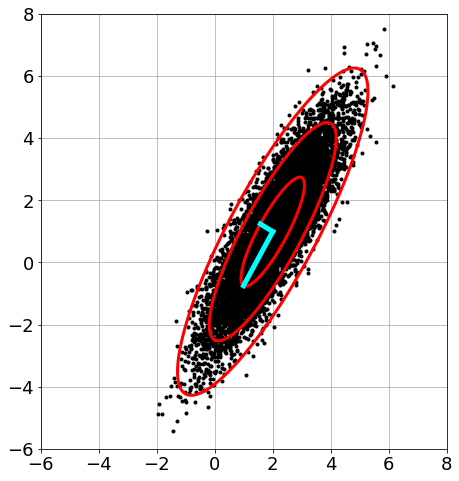

In [184]:
fig = plt.figure()
ax2 = fig.add_subplot(122)
ax2.plot(X[0,:],X[1,:], '.', Color='k')   # Plot data to overlay PCA
ax2.grid()
plt.xlim((-6,8))
plt.ylim((-6,8))

ax2.plot(x_mean[0] + deviation[0,:], x_mean[1] + deviation[1,:],'-',color='r',LineWidth=3)
ax2.plot(x_mean[0] + 2*deviation[0,:], x_mean[1] + 2*deviation[1,:],'-',color='r',LineWidth=3)
ax2.plot(x_mean[0] + 3*deviation[0,:], x_mean[1] + 3*deviation[1,:],'-',color='r',LineWidth=3)

# Plot principal components U[:,0]S[0] and U[:,1]S[1]
ax2.plot(np.array([x_mean[0], x_mean[0]+U[0,0]*S[0]]),
         np.array([x_mean[1], x_mean[1]+U[1,0]*S[0]]),'-',color='cyan',LineWidth=5)
ax2.plot(np.array([x_mean[0], x_mean[0]+U[0,1]*S[1]]),
         np.array([x_mean[1], x_mean[1]+U[1,1]*S[1]]),'-',color='cyan',LineWidth=5)

plt.show()

In [105]:
V_loadings = VT.T
print(V_loadings,V_loadings.shape,"V_loadings")

[[-0.01455147  0.01270744]
 [-0.00745895  0.00285587]
 [ 0.01038226 -0.00525856]
 ...
 [ 0.0045502   0.00680421]
 [-0.00959833 -0.00682887]
 [ 0.01077758 -0.00854101]] (10000, 2) V_loadings


In [108]:
V_D = covariance @ VT.T
print(V_D,V_D.shape,"V_D")

[[-587.83084566   31.12322766]
 [-301.31660737    6.99462853]
 [ 419.40860274  -12.87932515]
 ...
 [ 183.81315028   16.66496573]
 [-387.74068269  -16.72536031]
 [ 435.37833448  -20.91875808]] (10000, 2) V_D


In [110]:
T = B @ VT.T
print(T,T.shape,"principal components of B @ V")

[[-100.79926381  -42.81578844]
 [-173.88554974   24.81977347]] (2, 2) principal components of B @ V


In [111]:
T_US = U @ S
print(T_US,T_US.shape,"principal components of U @ S")

[[-100.79926381  -42.81578844]
 [-173.88554974   24.81977347]] (2, 2) principal components of U @ S


In [115]:
C_V1BTBV1 = VT @ B.T @ B @ VT.T
print(C_V1BTBV1,C_V1BTBV1.shape,"covariance")

[[4.03966760e+04 1.41398004e-12]
 [2.67452727e-13 2.44921290e+03]] (2, 2) covariance


In [112]:
observations = np.loadtxt('ovariancancer_obs.csv', delimiter=',')
print(observations,observations.shape,"observations")

[[ 0.063915   0.033242   0.018484  ...  0.038839   0.038151   0.032085 ]
 [ 0.025409   0.051085   0.056305  ...  0.020427   0.023261   0.019975 ]
 [ 0.025536   0.036123   0.054195  ... -0.0094466  0.021481   0.025569 ]
 ...
 [ 0.023558   0.021331   0.01621   ...  0.0082736  0.004742   0.024756 ]
 [ 0.028351   0.023266   0.0045561 ...  0.010033   0.017391   0.031537 ]
 [ 0.027428   0.027021   0.015273  ...  0.026642   0.027718   0.040418 ]] (216, 4000) observations


In [113]:
f = open('ovariancancer_grp.csv',"r")
f


<_io.TextIOWrapper name='ovariancancer_grp.csv' mode='r' encoding='UTF-8'>

In [114]:
group = f.read().split("\n")
group

['Cancer',
 'Cancer',
 'Cancer',
 'Cancer',
 'Cancer',
 'Cancer',
 'Cancer',
 'Cancer',
 'Cancer',
 'Cancer',
 'Cancer',
 'Cancer',
 'Cancer',
 'Cancer',
 'Cancer',
 'Cancer',
 'Cancer',
 'Cancer',
 'Cancer',
 'Cancer',
 'Cancer',
 'Cancer',
 'Cancer',
 'Cancer',
 'Cancer',
 'Cancer',
 'Cancer',
 'Cancer',
 'Cancer',
 'Cancer',
 'Cancer',
 'Cancer',
 'Cancer',
 'Cancer',
 'Cancer',
 'Cancer',
 'Cancer',
 'Cancer',
 'Cancer',
 'Cancer',
 'Cancer',
 'Cancer',
 'Cancer',
 'Cancer',
 'Cancer',
 'Cancer',
 'Cancer',
 'Cancer',
 'Cancer',
 'Cancer',
 'Cancer',
 'Cancer',
 'Cancer',
 'Cancer',
 'Cancer',
 'Cancer',
 'Cancer',
 'Cancer',
 'Cancer',
 'Cancer',
 'Cancer',
 'Cancer',
 'Cancer',
 'Cancer',
 'Cancer',
 'Cancer',
 'Cancer',
 'Cancer',
 'Cancer',
 'Cancer',
 'Cancer',
 'Cancer',
 'Cancer',
 'Cancer',
 'Cancer',
 'Cancer',
 'Cancer',
 'Cancer',
 'Cancer',
 'Cancer',
 'Cancer',
 'Cancer',
 'Cancer',
 'Cancer',
 'Cancer',
 'Cancer',
 'Cancer',
 'Cancer',
 'Cancer',
 'Cancer',
 'Cancer',

In [18]:
U,S,VT = np.linalg.svd(observations,full_matrices=False)
S = np.diag(S)
print(U,U.shape,"U")
print(S,S.shape,"S")


[[-0.0577678  -0.04858544  0.03224939 ... -0.00448284  0.02854983
  -0.03294778]
 [-0.05616021 -0.05015381 -0.00648035 ...  0.0237815   0.00049225
   0.00606339]
 [-0.0447222  -0.09643244  0.00299052 ...  0.00042229  0.00827564
  -0.00978713]
 ...
 [-0.06791642 -0.02433165  0.13271557 ...  0.06350802  0.02983646
  -0.00426709]
 [-0.07168472 -0.01309551  0.15645677 ... -0.16209063  0.02788101
   0.18604786]
 [-0.06614115 -0.00708132 -0.04926619 ...  0.02450533 -0.08484526
  -0.04331567]] (216, 216) U
[[8.29279895e+02 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 1.03024891e+02 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 4.93768639e+01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 8.34966337e-01
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  7.95003845e-01 0.00000000e

In [35]:
x = np.matrix(np.arange(12).reshape((3, 4)))
x

matrix([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])

In [40]:
print(x.mean())


5.5


In [38]:
print(x.mean(1))


[[1.5]
 [5.5]
 [9.5]]


In [19]:
print(VT,VT.shape,"VT")


[[-0.00060164 -0.0005753  -0.00052043 ... -0.00048118 -0.00046371
  -0.00046603]
 [-0.00102053 -0.00082593 -0.00100337 ... -0.00164536 -0.00163812
  -0.00141799]
 [-0.00051662 -0.00091245 -0.00049831 ... -0.0006867  -0.000277
  -0.00026139]
 ...
 [ 0.00312521  0.00946269  0.00544211 ...  0.0219999   0.01305783
  -0.00138808]
 [ 0.01704698  0.01374886  0.0118848  ... -0.00584029 -0.01819346
  -0.02161528]
 [-0.01654069 -0.00974341 -0.00026356 ... -0.00794087  0.00280175
   0.00369631]] (216, 4000) VT


In [20]:
patient_count = observations.shape[0]
patient_count

216

In [22]:
observations[0,:].shape

(4000,)

In [27]:
VT[0,:] @ observations[0,:]

-47.90567546653094

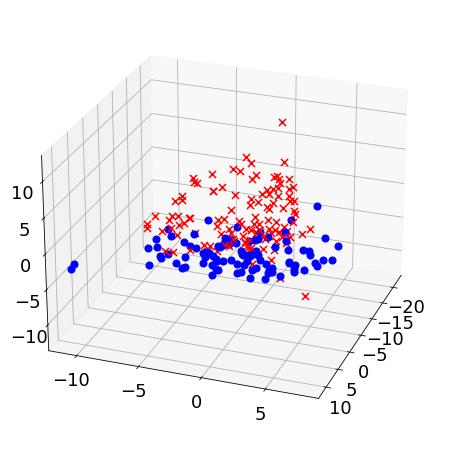

In [33]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = [16, 8]
plt.rcParams.update({'font.size': 18})

fig2 = plt.figure()
ax = fig2.add_subplot(111, projection='3d')

for i in range(patient_count):
    x = VT[1,:] @ observations[i,:]
    y = VT[2,:] @ observations[i,:]
    z = VT[3,:] @ observations[i,:]
    
    if group[i] == 'Cancer':
        ax.scatter(x,y,z, marker='x',color='r',s=50)
    else:
        ax.scatter(x,y,z, marker='o',color='b',s=50)
        
ax.view_init(25,20)
plt.show()